<a href="https://colab.research.google.com/github/choarauc/form_ch/blob/main/twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving twitter1600000.csv to twitter1600000.csv


In [ ]:
import pandas as pd
df = pd.read_csv('twitter1600000.csv', sep=',', encoding = "ISO-8859-1", header=0)
new_columns = ['label', 'tweet_id', 'date', 'query', 'user_name', 'text']
df.columns = new_columns

In [ ]:
df

,label,tweet_id,date,query,user_name,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
print(df.label.unique())
df.label = df.label.replace([0,4],[-1,1])

[0 4]


In [ ]:
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x,"%a %b %d %H:%M:%S PDT %Y"))

+ Créer une colonne à df pour l'année du tweet.
+ Créer une colonne à df pour le mois du tweet.
+ Créer une colonne à df pour le jour de la semaine du tweet.
+ Créer une colonne à df pour l'heure du tweet.
+ Afficher les 5 premières lignes.

In [ ]:
#@title
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month
df['weekday'] = pd.to_datetime(df['date']).dt.weekday
df['hour'] = pd.to_datetime(df['date']).dt.hour
df.head()

,label,tweet_id,date,query,user_name,text,year,month,weekday,hour
0,-1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,2009,4,0,22
1,-1,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,2009,4,0,22
2,-1,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009,4,0,22
3,-1,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",2009,4,0,22
4,-1,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,2009,4,0,22


+ Afficher le nombre de tweets en fonction du mois sous forme d'un graphique à barres.
+ Afficher le nombre de tweets en fonction du mois et du sentiment (label) sous forme d'un graphique à barres.

<Axes: xlabel='month', ylabel='count'>

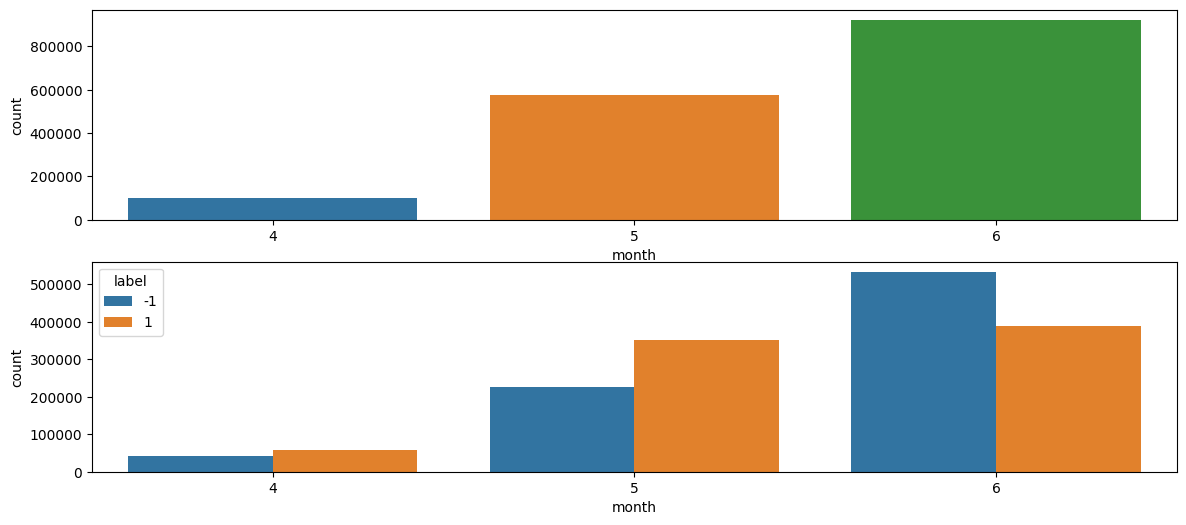

In [ ]:
#@title
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 6))
plt.subplot(211)
sns.countplot(x="month", data=df)
plt.subplot(212)
sns.countplot(x="month", hue='label', data=df)

> Nous remarquons ici, que les tweets ont été extraits beaucoup plus dans le mois 5 et 6.

+ Afficher le nombre de tweets en fonction du jour de la semaine sous forme d'un graphique à barres.
+ Afficher le nombre de tweets en fonction du jour de la semaine et du sentiment (label) sous forme d'un graphique à barres.

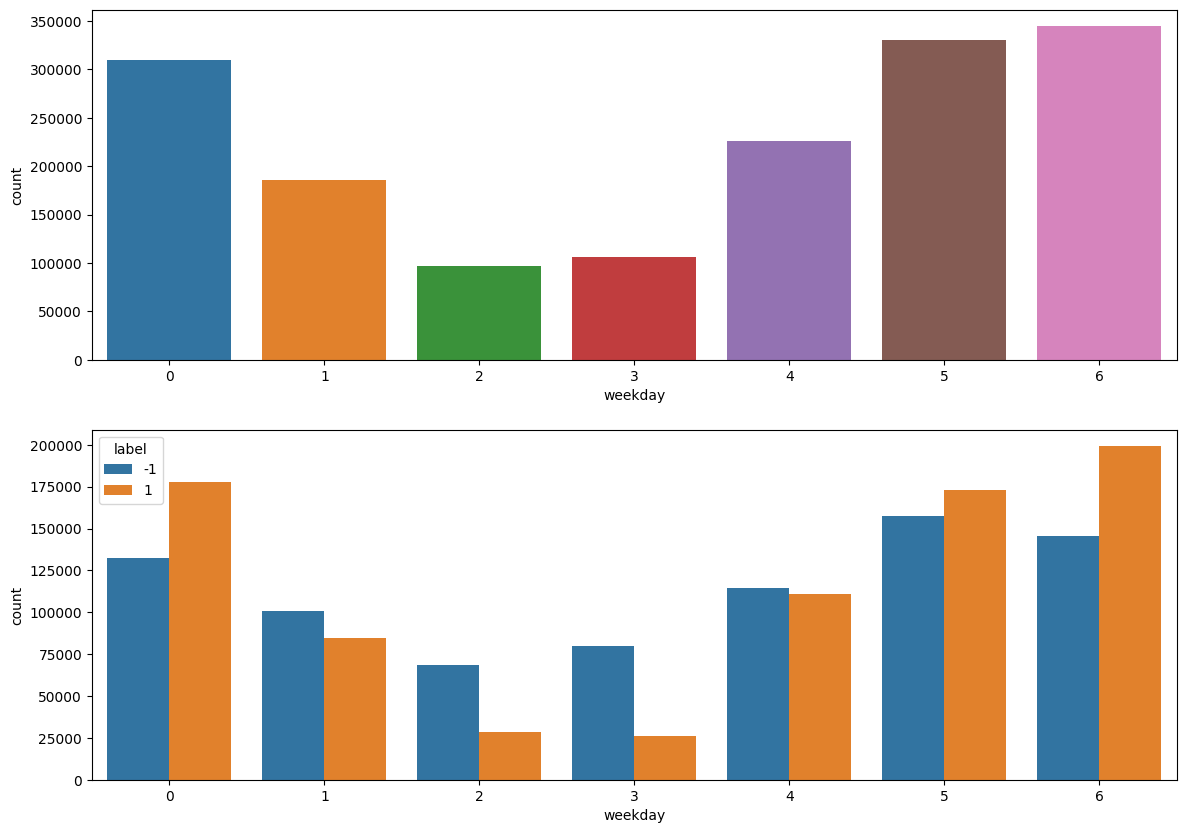

In [ ]:
#@title
plt.figure(figsize=(14, 10))
plt.subplot(211)
sns.countplot(x="weekday", data=df)
plt.subplot(212)
sns.countplot(x="weekday", hue='label', data=df);

> Nous remarquons ici que les utilisateurs utilisent mois Twitter en milieu de semaine, et c'est surtout pour être négatif.

+ Afficher le nombre de tweets en fonction de l'heure sous forme d'un graphique à barres.
+ Afficher le nombre de tweets en fonction de l'heure et du sentiment (label) sous forme d'un graphique à barres.

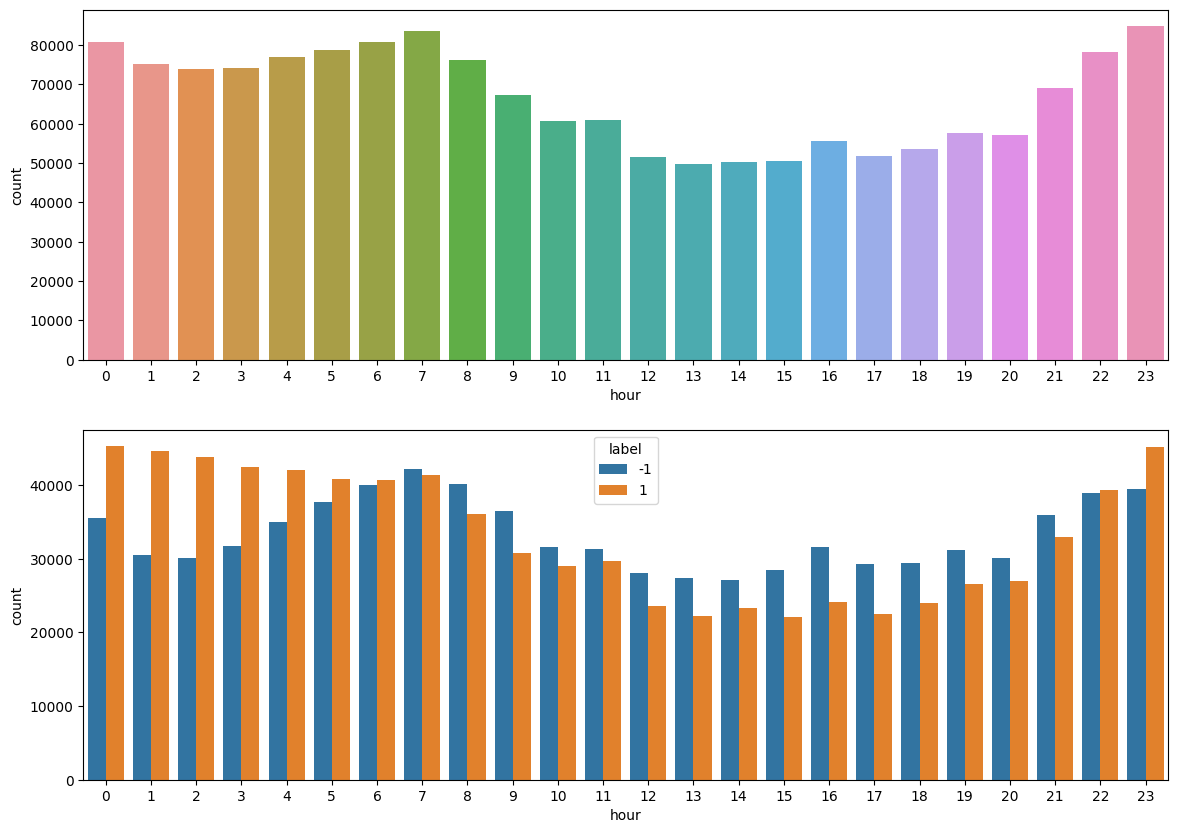

In [ ]:
#@title
plt.figure(figsize=(14,10))
plt.subplot(211)
sns.countplot(x = "hour",data=df)
plt.subplot(212)
sns.countplot(x= "hour",hue='label',data=df);

> Dans la partie précédente, nous avons afficher quelques relations interessantes sur la date de publication. Nous allons maintenant nous intéresser au texte.
>
> Lorsque vous scrapez des tweets à l'aide de l'api de twitter, l'api va également extraire les retweets. Les retweets commencent tous par "RT" suivi du tweet. Il est très souvent judicieux d'enlever les retweets pour éviter d'avoir des doublons.

+ Exécuter la cellule suivante pour vérifier si il y'a des retweets dans notre jeu de données.

In [ ]:
# vérifier si il y'a des retweets dans notre jeu de données.

import re
count = 0
for tweet in df.text :
    if tweet[:2]=='RT':
        count += 1
            
count

0

**Metadonnée + preprocessing**

> Il est très souvent judicieux d'enlever les éléments qui n'auront pas d'importance pour classifier le sentiment d'un tweet. Le nom de l'adresse mail en lui-même ne devrait donner aucune information sur le sentiment du tweet, on pourrait donc appliquer une règle d'expression pour les enlever. Mais, le nombre d'adresse mail cité dans le tweet pourrait avoir une importance concernant le sérieux du tweet.

+ Extraire les adresses mails de la variable à l'aide d'une règle d'expression.
+ Remplacer les adresses mail par la chaine de caractère "mail".

In [ ]:
#@title
text = "from : contact@gmail.com \n to : help@gmail.com \n cc: help@yahoo.fr et contact@wildcode.fr"

r = re.compile(r'[a-zA-Z0-9.-]*@[a-zA-Z0-9.-]*')
print(r.findall(text))
print(r.sub('mail', text))

['contact@gmail.com', 'help@gmail.com', 'help@yahoo.fr', 'contact@wildcode.fr']
from : mail 
 to : mail 
 cc: mail et mail


Pour analyser le sentiment d'un tweet, nous pouvons alors extraire :
> + Le nombre de lien "http(s)" ou "www.".
+ Le nombre d'adresse mail.
+ Le nombre d'hashtag.
+ Le nombre de citation d'utilisateur.
+ Le nombre de lettre en majuscule.
+ Le nombre de chaine lettre en majuscule.
+ Le nombre de point d'exclamation.
+ Le nombre de chaîne de point d'exclamation.
+ Le nombre de point d'interrogation.
+ Le nombre de chaîne de point d'interrogation.
+ Le nombre de point ect (...).

+ Exécuter la cellule suivante pour définir les fonctions d'extractions de données et de pré-processing


In [ ]:
#  remote function

def removeLink(tweet):
    r1 = re.compile(r"https?://[a-zA-Z0-9./]+")
    links = r1.findall(tweet)
    tweet = r1.sub('', tweet)
    r2 = re.compile(r"www\.[a-zA-Z0-9.-:/]+")
    links += r2.findall(tweet)
    return r2.sub('', tweet)

def removeMail(tweet):
    r = re.compile(r"[a-zA-Z0-9.-]+@[a-zA-Z.]+")
    mails = r.findall(tweet)
    return r.sub('', tweet)

def replaceHashtag(tweet):
    r = re.compile(r"#[a-zA-Z0-9]+")
    hashtag = r.findall(tweet)
    tweet = tweet.replace('#', '_')
    return r.sub('_', tweet)

def removeQuote(tweet):
    r = re.compile(r"@[a-zA-Z0-9]+")
    quote = r.findall(tweet)
    return r.sub('', tweet)


# Find function
def findLink(tweet):
    r1 = re.compile(r"https?://[a-zA-Z0-9./]+")
    links = r1.findall(tweet)
    r2 = re.compile(r"www\.[a-zA-Z0-9.-:/]+")
    links += r2.findall(tweet)
    return len(links)

def findMail(tweet):
    r = re.compile(r"[a-zA-Z0-9.-]+@[a-zA-Z.]+")
    mails = r.findall(tweet)
    return len(mails)
    

def findQuote(tweet):
    r = re.compile(r"@[a-zA-Z0-9]+")
    quote = r.findall(tweet)
    return len(quote)

def findHashtag(tweet):
    r = re.compile(r"#[a-zA-Z0-9]+")
    hashtag = r.findall(tweet)
    return len(hashtag)

def findCAPSLOCK(tweet):
    r = re.compile(r"[A-Z]")
    capslock = r.findall(tweet)
    return len(capslock)

def find_chain_CAPSLOCK(tweet):
    r = re.compile(r"[A-Z]{2,}")
    capslock = r.findall(tweet)
    return len(capslock)
    
def find_exclamation(tweet):
    r = re.compile(r"\!")
    exclamation = r.findall(tweet)
    return len(exclamation)

def find_chain_exclamation(tweet):
    r = re.compile(r"\!{2,}")
    exclamation = r.findall(tweet)
    return len(exclamation)

def find_interogation(tweet):
    r = re.compile(r"\?")
    interogation = r.findall(tweet)
    return len(interogation)

def find_etc(tweet):
    r = re.compile(r"\.{2,}")
    etc = r.findall(tweet)
    return len(etc)

+ Appliquer les transformations ci-dessus à df.

In [ ]:
#@title
# Links
df['links'] = df.text.apply(lambda x: findLink(x))
df.text = df.text.apply(lambda x: removeLink(x))
# Mails
df['mails'] = df.text.apply(lambda x: findMail(x))
df.text = df.text.apply(lambda x: removeMail(x))
# Quotes
df['quotes'] = df.text.apply(lambda x: findQuote(x))
df.text = df.text.apply(lambda x: removeQuote(x))
# Hastags
df['hashtags'] = df.text.apply(lambda x: findHashtag(x))
df.text = df.text.apply(lambda x: replaceHashtag(x))
# Others
df['capslock'] = df.text.apply(lambda x: findCAPSLOCK(x))
df['chain_capslock'] = df.text.apply(lambda x: find_chain_CAPSLOCK(x))
df['exclamation'] = df.text.apply(lambda x: find_exclamation(x))
df['chain_exclamation'] = df.text.apply(lambda x: find_chain_exclamation(x))
df['interogation'] = df.text.apply(lambda x: find_interogation(x))
df['etc'] = df.text.apply(lambda x: find_etc(x))
df['nb_caracter'] = df.text.apply(len)
df.head()

,label,tweet_id,date,query,user_name,text,year,month,weekday,hour,...,mails,quotes,hashtags,capslock,chain_capslock,exclamation,chain_exclamation,interogation,etc,nb_caracter
0,-1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,2009,4,0,22,...,0,0,0,3,0,1,0,0,1,111
1,-1,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,I dived many times for the ball. Managed to s...,2009,4,0,22,...,0,1,0,3,0,0,0,0,0,80
2,-1,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009,4,0,22,...,0,0,0,0,0,0,0,0,0,47
3,-1,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"no, it's not behaving at all. i'm mad. why am...",2009,4,0,22,...,0,1,0,1,0,0,0,1,0,95
4,-1,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,not the whole crew,2009,4,0,22,...,0,1,0,0,0,0,0,0,0,20


+ Exécuter la cellule suivante pour regrouper et sommer chaque colonne en fonction du label.

In [ ]:
df[['links', 'mails', 'quotes', 'hashtags', 'label', 'capslock', 'chain_capslock', 'exclamation', 'chain_exclamation', 'interogation', 'nb_caracter']].groupby(['label']).sum()

,links,mails,quotes,hashtags,capslock,chain_capslock,exclamation,chain_exclamation,interogation,nb_caracter
label,,,,,,,,,,
-1,26378,676,312812,18366,2158366,215505,385230,62647,117413,55506914
1,55240,1523,467058,25680,2308264,227341,532720,80213,130149,52876757


+ Exécuter la cellule suivante pour regrouper et moyenner chaque colonne en fonction du label.

In [ ]:
df[['links', 'mails', 'quotes', 'hashtags', 'label', 'capslock', 'chain_capslock', 'exclamation', 'chain_exclamation', 'interogation', 'nb_caracter']].groupby(['label']).mean()

,links,mails,quotes,hashtags,capslock,chain_capslock,exclamation,chain_exclamation,interogation,nb_caracter
label,,,,,,,,,,
-1,0.032973,0.000845,0.391015,0.022958,2.697961,0.269382,0.481538,0.078309,0.146766,69.383729
1,0.069050,0.001904,0.583823,0.032100,2.885330,0.284176,0.665900,0.100266,0.162686,66.095946


> Ici, nous remarquons que si le tweet est composé de lien ou d'adresse mail, il aura tendance à être beaucoup plus positif. Mais, nous remarquons aussi que la plupart des tweets ne possède pas d'adresse mail (environ 1 tweet sur 1000).

+ Exécuter la cellule suivante pour entraîner un modèle de régression logitique pour classifier le sentiment d'un tweet. Nous allons utiliser uniquement les metadonnées comme caractéritiques.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

dataframe = df[['text', 'links', 'mails', 'quotes', 'hashtags', 'capslock', 'chain_capslock', 'exclamation', 'chain_exclamation', 'interogation', 'nb_caracter', 'label']]
X_train, X_test, y_train, y_test = train_test_split(dataframe.drop(['text','label'], axis=1), df.label, test_size=0.2, random_state=1234)
logreg = LogisticRegression(max_iter=100)
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.596634375

> Il est assez difficile à un modèle de demander de haute performance uniquement sur des metadonnées. Mais, nous pouvons constater que ses metadonnées donnent de l'information sur le sentiment du tweet.

**Bag of words**

Nous allons maintenant essayer d'extraire plus d'information du texte. Mais, nous ne pouvons pas directement travailler avec du texte avec les algorithmes de machine learning.

Il est donc nécessaire de représenter le texte sous forme d'un vecteur traitable par un algorithme de machine learning.

Un modèle simple et efficace pour transformer un texte en vecteur est le modèle Bag-of-Words (ou BoW). Le modèle jette toutes informations sur la séquentialité des mots et se concentre uniquement sur l'occurrence de mots dans le document.

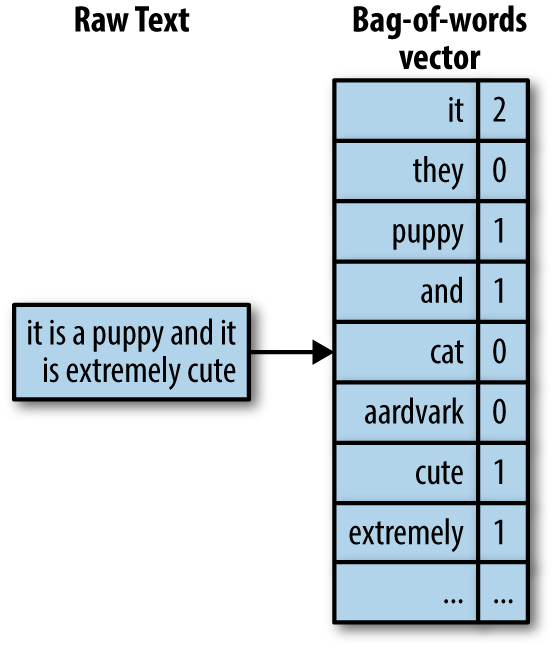

Dans la phrase "It is a puppy and it is extremely cute", le mot "it" se trouve 2 fois. Alors, la valeur de l'index du mot "it" (ici l'index du mot est 0) sera 2.

De cette manière, nous pouvons obtenir un vecteur d'occurrence qui représente notre tweet.

+ Exécuter la cellule suivante pour transformer notre text sous forme de vecteur d'occurence.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Split data in train and validate dataset.
df_train, df_test, y_train, y_test = train_test_split(dataframe.drop(['label'], axis=1), df.label, test_size=0.2, random_state=1234)
# Stopword
stopWords = set(stopwords.words('english'))
# Convertir l'ensemble en liste
stopWords_list = list(stopWords)
# Bag of words
vectorizer = CountVectorizer(stop_words=stopWords_list, max_features=5000)
X_train_text = vectorizer.fit_transform(df_train.text)
X_test_text = vectorizer.transform(df_test.text)

+ Exécuter la cellule suivante pour ajouter les metadonnées à notre vecteur d'occurence.


In [ ]:
from scipy.sparse import hstack
X_train = hstack((X_train_text, df_train.drop('text', axis=1).values))
X_test = hstack((X_test_text, df_test.drop('text', axis=1).values))

+ Exécuter la cellule suivante pour entraîner et afficher le résultat pour un modèle de bernouilli.

*Le modèle de Bernoulli est un modèle statistique utilisé pour modéliser des variables aléatoires binaires, c'est-à-dire des variables qui prennent deux valeurs possibles, généralement notées 0 et 1. Il est nommé d'après le mathématicien suisse Daniel Bernoulli.*

*Dans le modèle de Bernoulli, on suppose que la variable aléatoire suit une distribution de Bernoulli, qui est une distribution de probabilité discrète. La distribution de Bernoulli est définie par un seul paramètre, la probabilité de succès p, qui représente la probabilité d'obtenir la valeur 1.*

*Le modèle de Bernoulli est couramment utilisé dans divers domaines, tels que l'apprentissage automatique, la modélisation de données binaires, l'analyse de données et les statistiques. Il est souvent utilisé pour modéliser des événements binaires, tels que la présence ou l'absence d'une caractéristique, la réussite ou l'échec d'une expérience, l'acceptation ou le rejet d'une proposition, etc.*

*En utilisant le modèle de Bernoulli, on peut estimer la probabilité de succès pour une variable donnée, effectuer des prédictions basées sur cette probabilité et analyser les facteurs qui influencent la variable binaire.*

In [ ]:
from sklearn.naive_bayes import BernoulliNB
ber = BernoulliNB()
ber.fit(X_train, y_train)
ber.score(X_test, y_test)

0.75989375

**Pour aller plus loin - POS Tagging**

Dans le monde du traitement automatique du langage naturel (NLP), les modèles les plus fondamentaux sont basés sur Bag of Words. Mais de tels modèles ne parviennent pas à saisir les relations syntaxiques entre les mots.

Par exemple, supposons que nous construisions un analyseur de sentiments basé uniquement sur Bag of Words. Un tel modèle ne pourra pas faire la différence entre « I like you », où "like" est un verbe avec un sentiment positif, et « I am like you », où "like" est une préposition avec un sentiment neutre.

L'étiquetage morpho-syntaxique (POS Tagging), autrement appelé étiquetage grammatical, est un processus consistant à associer une étiquette à chaque mot d'un texte. Cette étiquette peut correspondre à la nature grammaticale (nom, adjectif, ...), le genre ou le nombre du mot cible.

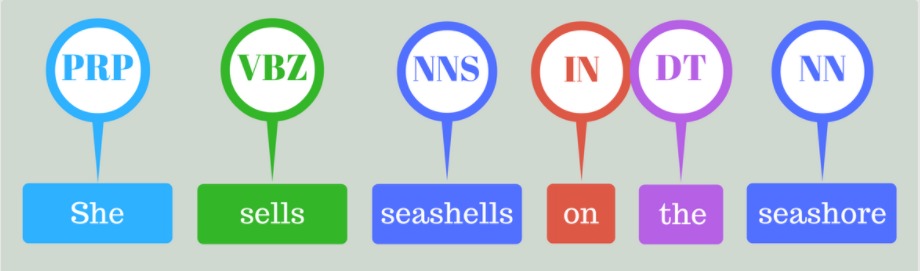

Cette tâche n’est pas simple, puisqu'un mot peut avoir plusieurs natures grammaticales. Dans la phrase « Give me your answer », "answer" est un nom, mais dans la phrase « Answer the question », "answer" est un verbe. Le modèle de résolution ne peut donc pas prendre l'hypothèse d'indépendance avec les mots environnants le mot cible.

+ Exécuter la cellule suivante pour ajouter à le tag associé à chaque mot.

In [ ]:
import nltk
from nltk import word_tokenize, pos_tag, sent_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# POS Tagging
def POStagging(tweet):  
    text = []
    # Split the tweet on sentence.
    sentences = sent_tokenize(tweet)
    # For each sentence
    for s in sentences:
        # Tokenize the sentence
        wordsList = nltk.word_tokenize(s)
        # Find the right token
        tagged = nltk.pos_tag(wordsList)
        # Convert the list of (token, tag) to token_tag and convert to str
        tagged = ' '.join(map(lambda X: '_'.join(X), tagged))
        text.append(tagged)
    return ' '.join(text)

print(POStagging('I am like you.'))
print(POStagging('I like you.'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


I_PRP am_VBP like_IN you_PRP ._.
I_PRP like_VBP you_PRP ._.


**Représentation vectorielle des mots**

La représentation vectorielle consiste à représenter un mot sous forme d'un vecteur.



**One hot Encoding**

La représentation vectorielle la plus classique des mots est le one hot encoding utilisée dans les approches BoW ou TF-IDF. Une dimension est allouée pour chaque mot du vocabulaire. En effet, chaque mot du vocabulaire est représenté comme un vecteur binaire avec toutes ses valeurs nulles à l'exception de l'index du mot.

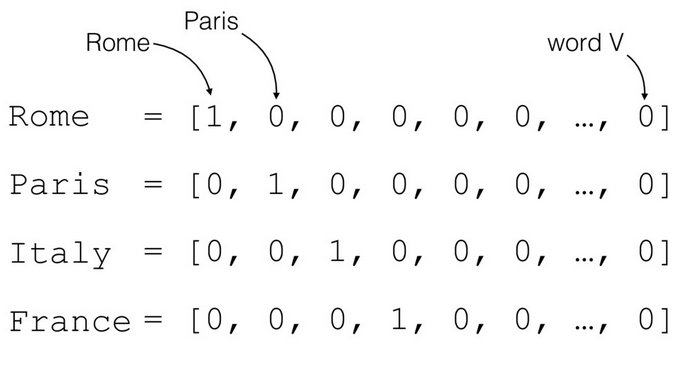

Pour illustrer l'encodage, prenons la phrase suivante :

    "I think therefore I am"

Nous allons attribuer un indice à chaque mot du vocabulaire. Nous pouvons représenter le vocabulaire sous forme de dictionnaire :

    {'i': 0, 'think': 1, 'therefore': 2, 'am': 3}

La méthode consiste alors à représenter le mot du vocabulaire sous forme de vecteur de dimension 4 (taille du vocabulaire) qui a toutes ses valeurs nulles à l'exception de l'index du mot.

+ Exécuter la cellule suivante pour afficher la représentation one hot du mot "therefore".

In [ ]:
import tensorflow as tf
# Dictionary
dictionary = {'i': 0, 'think': 1, 'therefore': 2, 'am': 3}
# One hot representation of "think"
tf.one_hot(dictionary['therefore'], 4).numpy()

array([0., 0., 1., 0.], dtype=float32)

> Avec cette représentation, tous les mots ont la même distance et la même similitude. L'encodage one hot n'apporte donc qu'une information selon laquelle un mot est différent d'un autre.

**Word2vec**

Il est possible d'entraîner la matrice W de manière non supervisé avec simplement du texte à l’aide du célèbre algorithme word2vec.

L'approche de Word2vec repose sur l'un des deux algorithmes suivants: Common Bag Of Words (CBOW) ou Skip-gram.

Prenons un exemple concret pour expliquer la principale différence entre les deux algorithmes.

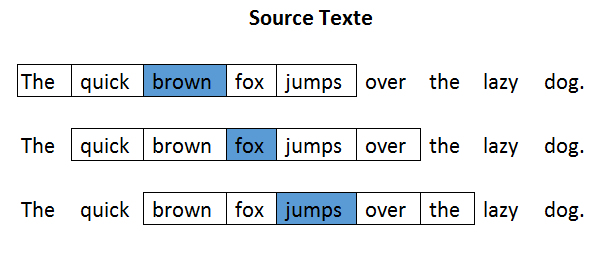

Dans cet exemple, nous avons choisi une fenêtre de taille 5. Le mot dans la case bleu est appelé le mot cible et les mots dans les cases blanches sont appelés mots du contexte.

+ L'approche CBOW consiste à prédire le mot cible à partir des mots du contexte.
+ L'approche Skip Gram consiste à prédire les mots du contexte à partir du mot cible.

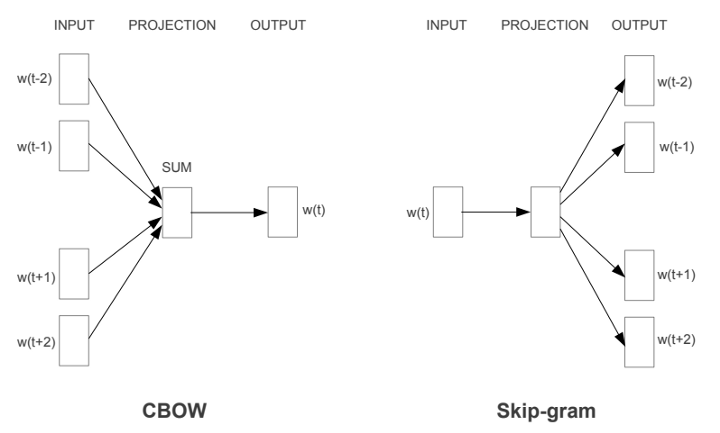

Les deux algorithmes utilisent un réseau neuronal à 3 couches (1 couche d'entrée, 1 couche cachée, 1 couche de sortie). La figure ci-dessous illustre une manière naïve d'effectuer l'apprentissage d'un modèle CBOW en utilisant une couche softmax de sortie. Étant donné la représentation de chaque mot du contexte, le modèle tente de prédire le mot cible le plus probable. Ainsi, l'entrée du modèle sont les mots du contexte (case blanche) et la sortie du modèle est une distribution de probabilité de la prédiction de mot cible.

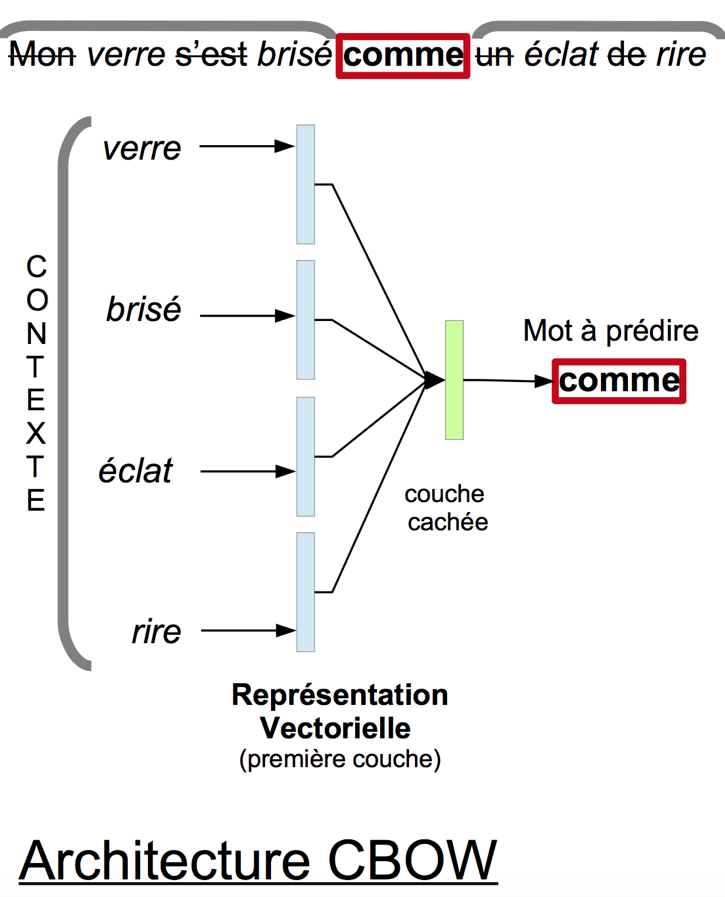

Pour une raison de temps de calcul, nous allons charger une matrice W déjà entrainé à l'aide de la librairie gensim.

+ Exécuter la cellule suivante pour charger un word2vec pré-entrainé.

In [ ]:
import gensim.downloader as api
model = api.load("glove-wiki-gigaword-200")

# from gensim.models import Word2Vec
# model = gensim.models.Word2Vec(sentences=review_lines, size=200, window=5, workers=-1, min_count=5)

[================================================--] 97.8% 246.4/252.1MB downloaded


+ Exécuter la cellule suivante pour afficher la représentation vectorielle du mot "france".


In [ ]:
model['france'].shape

(200,)

**Comment mesurer la similitude entre deux mots?** 

Cosine similarity est généralement utilisée comme métrique pour mesurer la distance lorsque la norme des vecteurs n'a pas d'importance. Cela se produit par exemple lorsque vous travaillez avec des données de texte représentées par le nombre de mots. Cette métrique capture la similitude, la distance entre deux mots. Elle représente la façon dont les mots sont liés les uns aux autres.

+ Exécuter la cellule suivante pour afficher les 10 mots les proches de "france".

In [ ]:
model.most_similar('france')

[('french', 0.7687349319458008),
 ('paris', 0.7100741863250732),
 ('belgium', 0.6559818983078003),
 ('spain', 0.6414428949356079),
 ('prohertrib', 0.618611216545105),
 ('britain', 0.6121155619621277),
 ('luxembourg', 0.5934340357780457),
 ('germany', 0.5928173661231995),
 ('italy', 0.5915644764900208),
 ('europe', 0.587535560131073)]

In [ ]:
model.most_similar('femur')

[('tibia', 0.8396404981613159),
 ('humerus', 0.7542150020599365),
 ('fibula', 0.7145512700080872),
 ('pelvis', 0.7057250738143921),
 ('clavicle', 0.6682341694831848),
 ('thighbone', 0.647692859172821),
 ('forearm', 0.6094048619270325),
 ('vertebrae', 0.6056876182556152),
 ('fracture', 0.5968077778816223),
 ('vertebra', 0.5967157483100891)]

In [ ]:
model.most_similar('cars')

[('vehicles', 0.8597253561019897),
 ('car', 0.8199902772903442),
 ('trucks', 0.7589101791381836),
 ('automobiles', 0.7505379319190979),
 ('vehicle', 0.7251043915748596),
 ('motorcycles', 0.7229335904121399),
 ('buses', 0.6971362233161926),
 ('truck', 0.646946907043457),
 ('driving', 0.6379231214523315),
 ('bicycles', 0.6285104155540466)]

**Propriétés arithmétiques**

Nous pouvons maintenant nous poser la question si notre sous-espace vectoriel des mots a des propriétés arithmétiques. Prenons le célèbre exemple suivant :


    King − Man + Woman = ??(Answer:Queen)

 
Dans cet exemple la propriété arithmétique est la royauté. Nous souhaitons vérifier si cette propriété va se propager à « woman ». C’est-à-dire que nous allons rechercher les mots les plus proches du vecteur suivant :

    arithmetic_vector = word2vec[index_word1] - word2vec[index_word2] + word2vec [index_word3]

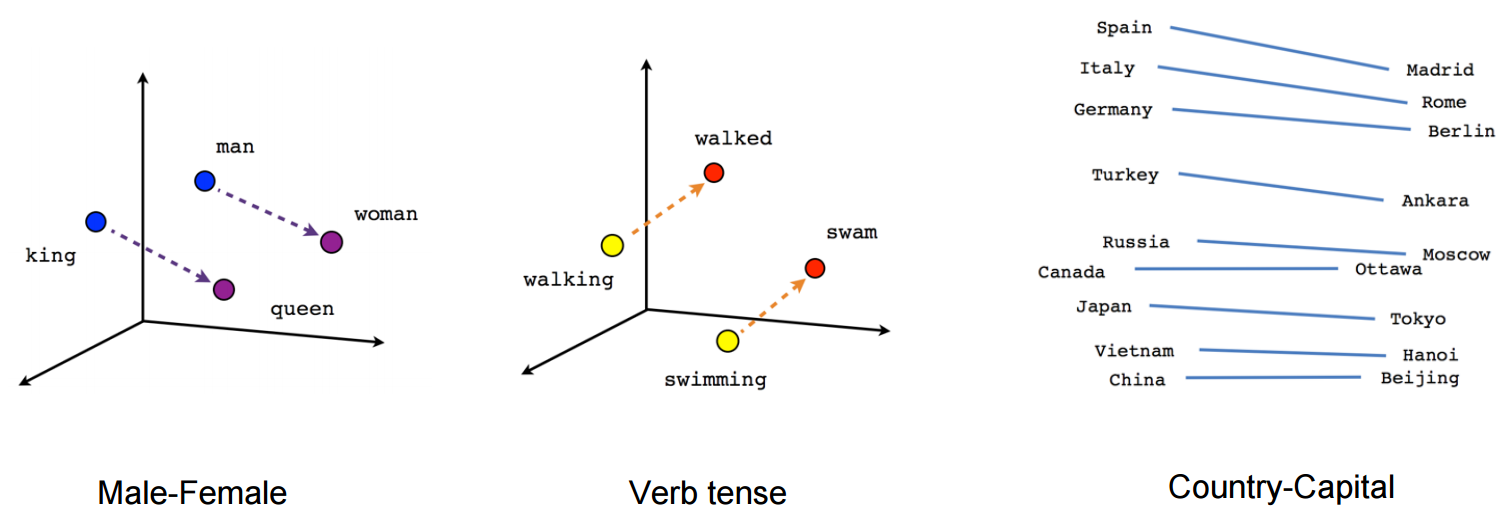

+ Exécuter la cellule suivante pour afficher les 10 mots les plus proches de      King−Man+Woman


In [ ]:
model.most_similar(positive=['king','woman'], negative=['man'])

[('queen', 0.6978678107261658),
 ('princess', 0.6081745028495789),
 ('monarch', 0.5889754891395569),
 ('throne', 0.5775108933448792),
 ('prince', 0.5750998258590698),
 ('elizabeth', 0.5463595986366272),
 ('daughter', 0.5399126410484314),
 ('kingdom', 0.5318052768707275),
 ('mother', 0.5168544054031372),
 ('crown', 0.5164473056793213)]

In [ ]:
model.most_similar(positive=['zombies','soldier'], negative=['zombie'])

[('soldiers', 0.6538006663322449),
 ('wounded', 0.5848568677902222),
 ('prisoner', 0.5508208274841309),
 ('policeman', 0.5489181876182556),
 ('marines', 0.540344774723053),
 ('army', 0.5359938144683838),
 ('captured', 0.5175200700759888),
 ('policemen', 0.514579176902771),
 ('comrades', 0.5134836435317993),
 ('troops', 0.5094326734542847)]

In [ ]:
model.most_similar(positive=['zombies','soldier'], negative=['dead'])

[('superhero', 0.483751118183136),
 ('supervillain', 0.4776393175125122),
 ('super-heroes', 0.46736565232276917),
 ('undead', 0.4670557677745819),
 ('superheroes', 0.4653278887271881),
 ('marvel', 0.43838807940483093),
 ('punisher', 0.4346800446510315),
 ('werewolves', 0.41873374581336975),
 ('flesh-eating', 0.41839516162872314),
 ('zombie', 0.41700297594070435)]

In [ ]:
model.most_similar(positive=['paris','italy'], negative=['france'])

[('rome', 0.7585406303405762),
 ('milan', 0.6850501298904419),
 ('italian', 0.6647829413414001),
 ('venice', 0.6126590967178345),
 ('turin', 0.5984683036804199),
 ('florence', 0.5939043760299683),
 ('bologna', 0.5863773822784424),
 ('naples', 0.5858203172683716),
 ('prohertrib', 0.5709968209266663),
 ('genoa', 0.5506733655929565)]

In [ ]:
model.most_similar(positive=['mother','son'], negative=['daughter'])

[('father', 0.9187806248664856),
 ('brother', 0.8050207495689392),
 ('grandfather', 0.7644326686859131),
 ('husband', 0.7391424179077148),
 ('uncle', 0.7305830121040344),
 ('grandson', 0.6806310415267944),
 ('boy', 0.669192910194397),
 ('grandmother', 0.6687804460525513),
 ('cousin', 0.6681280732154846),
 ('man', 0.6674685478210449)]

En utilisant une ACP, nous pouvons retrouver les dimensions des propriétés arithmétiques.

+ Exécuter la cellule suivante pour afficher la dimension de genre (masculin/féminin).

[0.21880297 0.18913766 0.17041014 0.1206088  0.07662011 0.0495167
 0.04141187 0.03509142 0.0285208 ]


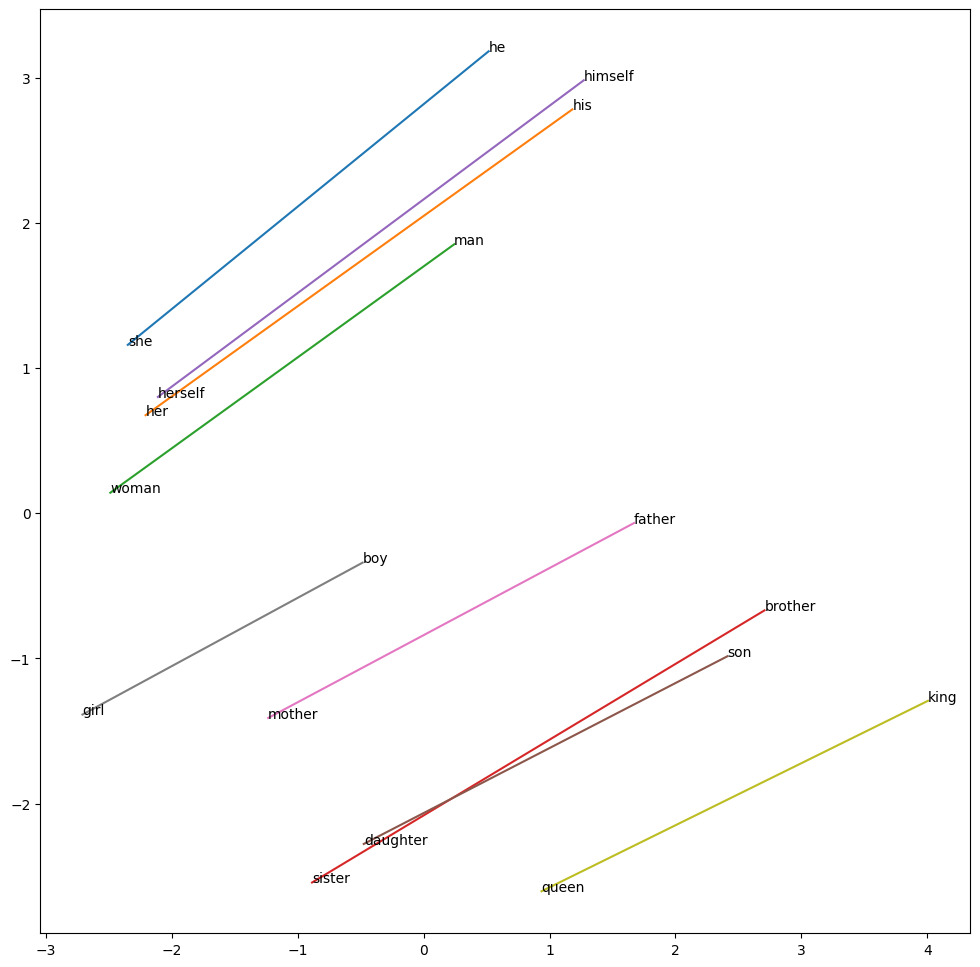

In [ ]:
%matplotlib inline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pairs = [('she', 'he'),
         ('her', 'his'),
         ('woman', 'man'),
         ('sister', 'brother'),
         ('herself', 'himself'),
         ('daughter', 'son'),
         ('mother', 'father'),
         ('girl', 'boy'),
         ('queen', 'king')]
n = np.shape(pairs)[0]

difference_matrix = np.array([model.get_vector(a[0]) - model.get_vector(a[1]) for a in pairs])

pca = PCA(n_components=n)
pca.fit(difference_matrix)

words = [model.get_vector(word) for word in np.concatenate(pairs)]

coord = pca.fit_transform(words)

print(pca.explained_variance_ratio_)

fig, axes = plt.subplots(figsize=(12, 12))
for i in range(n * 2):
    plt.annotate(np.concatenate(pairs)[i], (coord[i, 0], coord[i, 1]))
for i in range(n):
    plt.plot([coord[2 * i, 0], coord[2 * i + 1, 0]], [coord[2 * i, 1], coord[2 * i + 1, 1]])
plt.show()

+ Exécuter la cellule suivante pour afficher la relation entre capitals et pays.

[0.14851673 0.12063845 0.08792591 0.07117329 0.06635418 0.05810461
 0.05175019 0.04870687 0.04012399 0.03870777 0.03310861 0.02835682
 0.02818644 0.02461059 0.02377608 0.01700196 0.01680511]


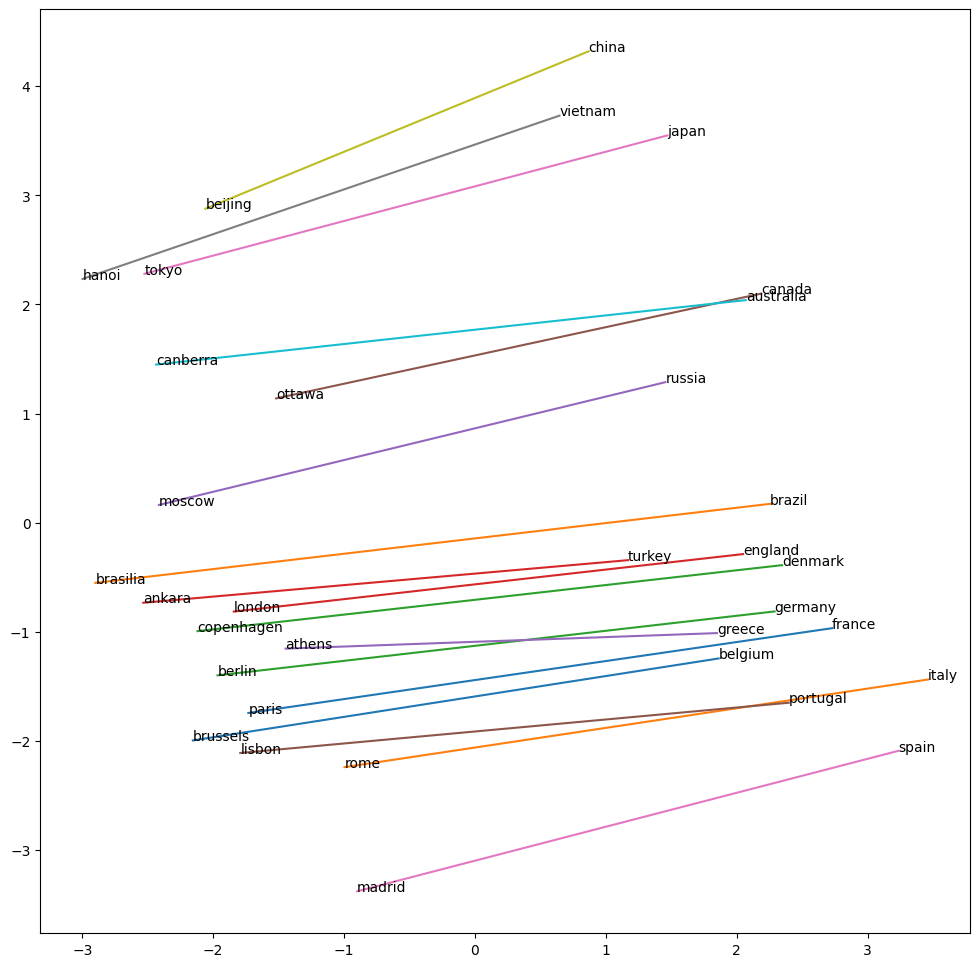

In [ ]:
pairs = [('paris', 'france'),
         ('rome', 'italy'),
         ('berlin', 'germany'),
         ('ankara', 'turkey'),
         ('moscow', 'russia'),
         ('ottawa', 'canada'),
         ('tokyo', 'japan'),
         ('hanoi', 'vietnam'),
         ('beijing', 'china'),
         ('canberra', 'australia'),
         ('brussels', 'belgium'),
         ('brasilia', 'brazil'),
         ('copenhagen', 'denmark'),
         ('london', 'england'),
         ('athens', 'greece'),
         ('lisbon', 'portugal'),
         ('madrid', 'spain')]

n = np.shape(pairs)[0]

difference_matrix = np.array([model.get_vector(a[0]) - model.get_vector(a[1]) for a in pairs])

pca = PCA(n_components=n)
pca.fit(difference_matrix)

words = [model.get_vector(word) for word in np.concatenate(pairs)]

coord = pca.fit_transform(words)

print(pca.explained_variance_ratio_)

fig, axes = plt.subplots(figsize=(12, 12))
for i in range(n * 2):
    plt.annotate(np.concatenate(pairs)[i], (coord[i, 0], coord[i, 1]))
for i in range(n):
    plt.plot([coord[2 * i, 0], coord[2 * i + 1, 0]], [coord[2 * i, 1], coord[2 * i + 1, 1]])
plt.show()

**Conclusion**

Le "word2vec embedding" capture efficacement les propriétés sémantiques et arithmétiques d'un mot. Il permet également de réduire la dimension du problème et par conséquent la tâche d'apprentissage.

Nous pouvons nous imaginer utiliser l’algorithme word2vec pour pré-entraîner la matrice d’embedding du modèle de sentiment analysis. Par conséquent, notre modèle de classification aura une bien meilleure représentation des mots lors de la phase d’apprentissage des sentiments.